In [1]:
### IMPORTAR LIBRERÍAS ###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### IMPORTAR LOS DATOS ###
data = pd.read_csv('appdata10.csv')
paginas = pd.read_csv('top_screens.csv').top_screens.values
print(paginas)

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker']


In [4]:
### UNIR LAS DOS BASES DE DATOS ###
#Aseguro que todos los datos sean una serie y esten separados por una coma
data['screen_list'] = data.screen_list.astype(str) + ','
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan,",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
#Creo nuevas columnas con las páginas más vistas e indico las páginas que fueron visitadas
#De igual forma reemplazo los datos de screen_list por los nombres de página visitados
for x in paginas:
    data[x] = data.screen_list.str.contains(x).astype(int)
    
data = data.drop(columns=['screen_list'])

#Sumar las columnas similares
#Pantallas de ahorros
pantalla_savings = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data["SavingCount"] = data[pantalla_savings].sum(axis=1)
data = data.drop(columns=pantalla_savings)
data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,SavingCount
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,15,0,0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Pantallas de créditos
pantalla_credits = ["Credit1",
                    "Credit2",
                    "Credit3",
                    "Credit3Container",
                    "Credit3Dashboard"]
data["CMCount"] = data[pantalla_credits].sum(axis=1)
data = data.drop(columns=pantalla_credits)
data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,SavingCount,CMCount
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,15,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,0,3
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,0,3


In [7]:
#Pantallas de CC
pantalla_cc = ["CC1",
                "CC1Category",
                "CC3"]
data["CCCount"] = data[pantalla_cc].sum(axis=1)
data = data.drop(columns=pantalla_cc)
data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,SavingCount,CMCount,CCCount
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,15,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,0,3,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,0,3,0


In [8]:
#Pantallas de prestamo
pantalla_loan = ["Loan",
                  "Loan2",
                  "Loan3",
                  "Loan4"]
data["LoansCount"] = data[pantalla_loan].sum(axis=1)
data = data.drop(columns=pantalla_loan)
data.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,SavingCount,CMCount,CCCount,LoansCount
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,15,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,2
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,13,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,2
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,3,0,1,0,NaN,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49.513,...,0,0,0,0,0,0,0,3,0,2
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37.841,...,0,0,0,0,0,0,0,3,0,2


In [9]:
### ANALIZAR LOS DATOS ###
#Conocer el formato de los datos
tipos_datos = data.dtypes
tipos_datos

user                        int64
first_open                 object
dayofweek                   int64
hour                       object
age                         int64
numscreens                  int64
minigame                    int64
used_premium_feature        int64
enrolled                    int64
enrolled_date              object
liked                       int64
location                    int32
Institutions                int32
VerifyPhone                 int32
BankVerification            int32
VerifyDateOfBirth           int32
ProfilePage                 int32
VerifyCountry               int32
Cycle                       int32
idscreen                    int32
Splash                      int32
RewardsContainer            int32
EditProfile                 int32
Finances                    int32
Alerts                      int32
Leaderboard                 int32
VerifyMobile                int32
VerifyHousing               int32
RewardDetail                int32
VerifyHousingA

In [10]:
#Conocer los datos nulos
datos_nulos = data.isnull().sum()
datos_nulos

user                           0
first_open                     0
dayofweek                      0
hour                           0
age                            0
numscreens                     0
minigame                       0
used_premium_feature           0
enrolled                       0
enrolled_date              18926
liked                          0
location                       0
Institutions                   0
VerifyPhone                    0
BankVerification               0
VerifyDateOfBirth              0
ProfilePage                    0
VerifyCountry                  0
Cycle                          0
idscreen                       0
Splash                         0
RewardsContainer               0
EditProfile                    0
Finances                       0
Alerts                         0
Leaderboard                    0
VerifyMobile                   0
VerifyHousing                  0
RewardDetail                   0
VerifyHousingAmount            0
ProfileMar

### PROCESAMIENTO Y VISUALIZACIÓN DE LOS DATOS

In [11]:
#Convierto la columna de hora en datos enteros
data.hour.head()
data["hour"] = data.hour.str.slice(1,3).astype(int)
data.hour.head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int32

Text(0.5, 1.0, 'Distribución de Edad de los Usuarios')

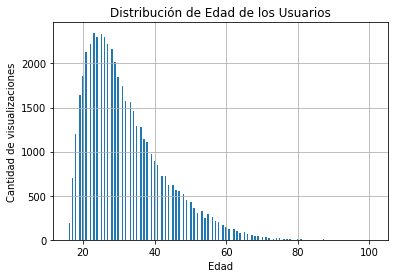

In [12]:
#Visualizar la distribución de edades de los usuarios
data.age.hist(bins=200)
plt.ylabel('Cantidad de visualizaciones')
plt.xlabel('Edad')
plt.title('Distribución de Edad de los Usuarios')

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Horas de Conexión')

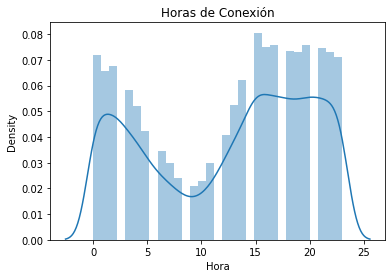

In [13]:
#Visualizar las horas de conexión
sns.distplot(data.hour)
plt.xlabel('Hora')
plt.title('Horas de Conexión')

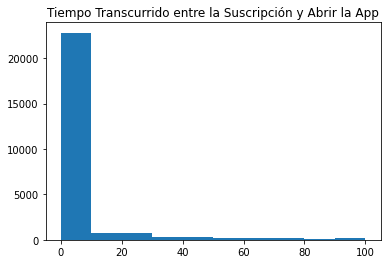

In [14]:
#Visualizar el tiempo transcurrido en que se suscribió y se abrió la aplicación
#Convierto las columnas con horas en formato datetime
data['first_open'] = pd.to_datetime(data['first_open'])
data['enrolled_date'] = pd.to_datetime(data['enrolled_date'])

data['diferencia'] = (data.enrolled_date-data.first_open).astype('timedelta64[h]')
plt.hist(data['diferencia'].dropna(), range = [0, 100])
plt.title('Tiempo Transcurrido entre la Suscripción y Abrir la App')
plt.show()

In [15]:
data = data.drop(columns=['user','first_open','enrolled_date','diferencia'])
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,SavingCount,CMCount,CCCount,LoansCount
0,3,2,23,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,6,1,24,13,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,16,28,40,0,0,1,0,1,0,...,0,0,0,0,0,0,0,3,0,2
4,1,18,31,32,0,0,1,1,0,1,...,0,0,0,0,0,0,0,3,0,2


### ANÁLISIS DE MACHINE LEARNING

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

In [17]:
#Definir las variables dependiente e independiente
y = data['enrolled']
X = data.drop('enrolled', axis = 1)

#Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [18]:
# Analisis discriminante lineal para mejorar el modelo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [19]:
#Definir el algoritmo
algoritmo = LogisticRegression()

#Entrenar el algoritmo
algoritmo.fit(X_train, y_train)

#Realizar una predicción
y_test_pred = algoritmo.predict(X_test)

In [20]:
#Se calcula la exactitud y precision del modelo
print("Exactitud: ", accuracy_score(y_test, y_test_pred))
print("Precisión: ", precision_score(y_test, y_test_pred))

Exactitud:  0.7375
Precisión:  0.7765990639625585
